<a href="https://colab.research.google.com/github/ankan92/Principle_Component_Analysis/blob/main/Student_Evaluation_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principle Component Analysis

A method for reducing your data into fewest 'principle components' that simultaneously maximize the amount of variance explained.

## Question:
### Do students' evaluations cluster together into components?

### Data
Aggeregate students' evaluations across 6 dimensions:
1. Present
2. Explain
3. Communicate
4. Teach
5. Workload
6. Difficulty

### Steps
1. Importing the data set
2. Load necessary packages
3. Extract necessary data fro PCA
4. Set up all of the preconditions
5. Run PCA/visualizations
6. Interpret the output
7. Setup for EFA
8. Run EFA/visualization
9. Interpret the output
10. Parallel Analysis
11. Mini-validations.

## Step 1: Import the data

The data are in .csv format: 'new_prof_data.csv'

Here is a brief description of the variables:


1. **ID** = Observation ID
2. **Prof.Name** = The name of the professor. Here, Name1 to Name213 are used
3. **Present** = “Presents the material in an organized, well-planned manner.”
4. **Explain** = “Explains concepts clearly and with appropriate use of examples.”
5. **Communi** = “Communicates enthusiasm and interest in the course material.”
6. **Teach** = “All things considered, performs effectively as a university teacher.”
7. **Workload** = “Compared to other courses at the same level, the workload is…”
8. **Difficulty** = “Compared to other courses at the same level, the level of difficulty of the material is…”
9. **learn.Exp** = “The value of the overall learning experience is…”
10. **Retake** = “Considering your experience with this course, and disregarding your need for it to meet program or degree requirements, would you still have taken this course?”
11. **Inf.** = The aggregate influence score (Interpersonal Charisma Scale)
12. **Kind** = The aggregate kindness score (Interpersonal Charisma Scale)


**_Notes._**

**Q3-Q6 scale**: 1 = extremely poor; 2 = very poor; 3 = poor; 4 = adequate; 5 = good; 6 = very good; 7 = outstanding

**Q7-Q9 scale**: 1 = very low; 2 = low; 3 = below average; 4 = average; 5 = above average; 6 = high; 7 = very high

**Q10 scale**: proportion of people out of 100 who would still take the course considering the experience

**Q11-Q12 scale**: “I am someone who is…”; 1 = strongly disagree; 2 = moderately disagree; 3 = neither agree nor disagree; 4 = moderately agree; 5 = strongly agree



##### Importing the library

In [68]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the data set

In [69]:
data = pd.read_csv('new_prof_data.csv')

#### Check the first ten values in the data set

In [70]:
data.head(10)

,ID,Prof.Name,Present,Explain,Communi,Teach,Workload,Difficulty,learn.Exp,Retake,Inf,Kind
0,1,Name1,5.616667,6.283333,6.700000,6.333333,4.500000,4.300000,5.833333,87.666667,3.666667,4.666667
1,2,Name2,5.700000,5.650000,5.733333,5.516667,4.183333,4.116667,4.550000,57.166667,3.666667,4.666667
2,3,Name3,6.033333,6.466667,6.666667,6.466667,4.400000,4.633333,6.000000,88.333333,5.000000,4.333333
3,4,Name4,6.066667,6.350000,6.650000,6.433333,4.416667,4.516667,5.916667,87.000000,2.666667,4.000000
4,5,Name5,6.600000,6.450000,6.600000,6.550000,4.900000,4.500000,6.050000,87.500000,3.666667,4.000000
5,6,Name6,5.950000,6.100000,6.350000,5.900000,5.100000,4.300000,5.850000,88.500000,2.000000,5.000000
6,7,Name7,6.250000,6.350000,6.550000,6.350000,4.200000,4.150000,5.650000,99.000000,3.666667,4.000000
7,8,Name8,6.300000,6.350000,6.400000,6.350000,5.100000,4.750000,5.550000,84.500000,4.333333,4.333333
8,9,Name9,6.400000,6.800000,6.800000,6.800000,4.600000,4.600000,6.400000,100.000000,4.333333,4.666667
9,10,Name10,5.600000,5.700000,6.400000,6.000000,3.800000,4.100000,5.100000,89.000000,3.666667,3.333333


#### Check Statistical description of the data set

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,213.0,107.000000,61.631972,1.000000,54.000000,107.000000,160.000000,213.00
Present,213.0,5.711416,0.572407,3.925000,5.350000,5.800000,6.100000,6.80
Explain,213.0,5.876808,0.506583,4.100000,5.600000,5.900000,6.300000,6.80
Communi,213.0,6.211236,0.448880,4.800000,5.950000,6.300000,6.550000,6.95
Teach,213.0,6.014734,0.488155,4.100000,5.700000,6.100000,6.400000,7.00
Workload,213.0,4.572046,0.553445,3.466667,4.200000,4.500000,4.900000,6.40
Difficulty,213.0,4.625356,0.488122,3.600000,4.300000,4.566667,4.900000,6.20
learn.Exp,213.0,5.367117,0.526943,4.000000,5.000000,5.350000,5.750000,7.00
Retake,213.0,79.536659,14.623438,30.000000,71.000000,83.000000,90.000000,100.00
Inf,213.0,3.837246,0.762465,1.000000,3.666667,4.000000,4.333333,5.00


### Check the information about the data set

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          213 non-null    int64  
 1   Prof.Name   213 non-null    object 
 2   Present     213 non-null    float64
 3   Explain     213 non-null    float64
 4   Communi     213 non-null    float64
 5   Teach       213 non-null    float64
 6   Workload    213 non-null    float64
 7   Difficulty  213 non-null    float64
 8   learn.Exp   213 non-null    float64
 9   Retake      213 non-null    float64
 10  Inf         213 non-null    float64
 11  Kind        213 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 20.1+ KB


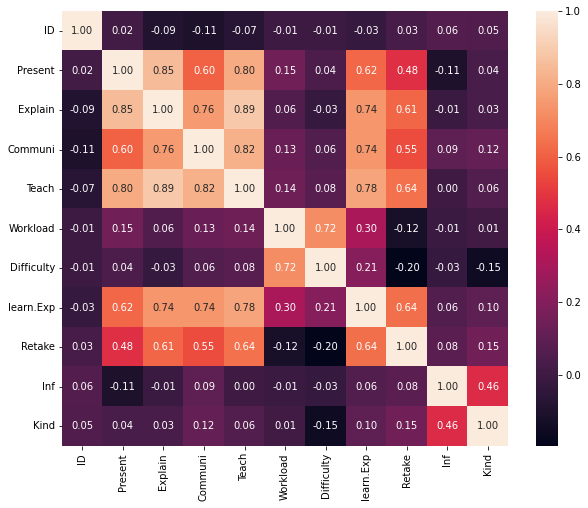

In [73]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot=True,fmt='.2f');

In [74]:
data.corr()

,ID,Present,Explain,Communi,Teach,Workload,Difficulty,learn.Exp,Retake,Inf,Kind
ID,1.000000,0.017781,-0.087636,-0.106949,-0.069268,-0.006907,-0.008311,-0.025445,0.028929,0.061431,0.051694
Present,0.017781,1.000000,0.854821,0.603428,0.800330,0.150866,0.042823,0.616825,0.480757,-0.106395,0.036390
Explain,-0.087636,0.854821,1.000000,0.755856,0.891306,0.055542,-0.026143,0.741157,0.613840,-0.012770,0.034684
Communi,-0.106949,0.603428,0.755856,1.000000,0.818614,0.127724,0.059773,0.739862,0.552323,0.094500,0.115317
Teach,-0.069268,0.800330,0.891306,0.818614,1.000000,0.137890,0.080889,0.784727,0.643970,0.002404,0.056537
Workload,-0.006907,0.150866,0.055542,0.127724,0.137890,1.000000,0.718739,0.304708,-0.118867,-0.011674,0.011457
Difficulty,-0.008311,0.042823,-0.026143,0.059773,0.080889,0.718739,1.000000,0.206047,-0.196634,-0.026118,-0.153567
learn.Exp,-0.025445,0.616825,0.741157,0.739862,0.784727,0.304708,0.206047,1.000000,0.636686,0.058079,0.095344
Retake,0.028929,0.480757,0.613840,0.552323,0.643970,-0.118867,-0.196634,0.636686,1.000000,0.084235,0.149050
Inf,0.061431,-0.106395,-0.012770,0.094500,0.002404,-0.011674,-0.026118,0.058079,0.084235,1.000000,0.463280


You can see immediately that all communication variables are highly correlated. The difficulty variable correlates quite highly with the workload variable. However, there appears to be little overlap between communication and workload/difficulty variables.

In [75]:
data_scaled = data.copy()

In [76]:
data_scaled.head()

,ID,Prof.Name,Present,Explain,Communi,Teach,Workload,Difficulty,learn.Exp,Retake,Inf,Kind
0,1,Name1,5.616667,6.283333,6.700000,6.333333,4.500000,4.300000,5.833333,87.666667,3.666667,4.666667
1,2,Name2,5.700000,5.650000,5.733333,5.516667,4.183333,4.116667,4.550000,57.166667,3.666667,4.666667
2,3,Name3,6.033333,6.466667,6.666667,6.466667,4.400000,4.633333,6.000000,88.333333,5.000000,4.333333
3,4,Name4,6.066667,6.350000,6.650000,6.433333,4.416667,4.516667,5.916667,87.000000,2.666667,4.000000
4,5,Name5,6.600000,6.450000,6.600000,6.550000,4.900000,4.500000,6.050000,87.500000,3.666667,4.000000


In [77]:
data_scaled.drop(['ID','Prof.Name'],axis =1, inplace = True )

In [78]:
from scipy.stats import zscore
data_scaled = data_scaled.apply(zscore)

In [79]:
#Check the data post scaling
data_scaled.head()

,Present,Explain,Communi,Teach,Workload,Difficulty,learn.Exp,Retake,Inf,Kind
0,-0.165918,0.804376,1.091415,0.654198,-0.130484,-0.668116,0.886841,0.557267,-0.224247,1.014335
1,-0.019991,-0.448775,-1.067163,-1.022710,-0.704006,-1.044590,-1.554326,-1.533339,-0.224247,1.014335
2,0.563717,1.167131,1.016982,0.927979,-0.311596,0.016381,1.203876,0.602963,1.528586,0.602019
3,0.622088,0.936287,0.979765,0.859534,-0.281411,-0.223193,1.045359,0.511571,-1.538873,0.189704
4,1.556021,1.134153,0.868114,1.099092,0.593964,-0.257418,1.298986,0.545843,-0.224247,0.189704


In [80]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
df= data.copy()
df.drop(['ID','Prof.Name'],axis =1, inplace = True )
df.head()

,Present,Explain,Communi,Teach,Workload,Difficulty,learn.Exp,Retake,Inf,Kind
0,5.616667,6.283333,6.700000,6.333333,4.500000,4.300000,5.833333,87.666667,3.666667,4.666667
1,5.700000,5.650000,5.733333,5.516667,4.183333,4.116667,4.550000,57.166667,3.666667,4.666667
2,6.033333,6.466667,6.666667,6.466667,4.400000,4.633333,6.000000,88.333333,5.000000,4.333333
3,6.066667,6.350000,6.650000,6.433333,4.416667,4.516667,5.916667,87.000000,2.666667,4.000000
4,6.600000,6.450000,6.600000,6.550000,4.900000,4.500000,6.050000,87.500000,3.666667,4.000000


In [89]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(data_scaled)
print('p_value: ',p_value)

if p_value<0.05:
  print('There are significant correlations between variables')
else:
  print('There are not significant correlations between variables')

p_value:  1.7073157132342936e-294
There are significant correlations between variables


In [90]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scaled)
kmo_model

0.7996945035850959

In [91]:
# Applying PCA taking all the features
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=123 )
pcs_transformed = pca.fit_transform(data_scaled)

In [93]:
#Extract eigen vectors
pca.components_


array([[-3.92103386e-01, -4.34778183e-01, -4.03283892e-01,
        -4.44793414e-01, -8.62656401e-02, -3.81055211e-02,
        -4.10599052e-01, -3.40492068e-01, -1.89165902e-02,
        -5.44584942e-02],
       [ 2.45185032e-02, -5.95366154e-02, -1.49400391e-02,
         2.79696576e-03,  6.25626416e-01,  6.60349459e-01,
         1.09350880e-01, -2.53501360e-01, -1.81292008e-01,
        -2.43035061e-01],
       [ 1.39948244e-01,  1.10078479e-01, -5.08786159e-02,
         5.33476871e-02, -2.49826188e-01, -1.66281052e-01,
        -7.77816867e-02,  4.08771447e-03, -6.79509650e-01,
        -6.36396128e-01],
       [-4.08794662e-01, -9.99114689e-02,  1.50846474e-01,
        -5.47112246e-03, -1.64135013e-01,  1.52818839e-01,
         1.82251039e-01,  3.05236070e-01,  4.79402150e-01,
        -6.27387607e-01],
       [ 3.60406096e-01,  2.65123991e-01,  9.86118161e-02,
         1.23864114e-01, -1.65289093e-01,  2.32448968e-03,
        -2.84538297e-01, -6.31278504e-01,  4.49277180e-01,
        -2.

In [96]:
# Check the eigen values
# Note: This is always return on descending order
pca.explained_variance_

array([4.59862876, 1.8659381 , 1.46710004, 0.5909634 , 0.51484325,
       0.3638616 , 0.25788309, 0.19391465, 0.10687128, 0.08716563])

In [95]:
# Check the explaind variance for each pc
# Note explained variance = (eigen value of each PC)/(sum of eigen values of all PC)
pca.explained_variance_ratio_

array([0.4577039 , 0.18571778, 0.14602122, 0.05881889, 0.05124262,
       0.03621533, 0.02566724, 0.01930043, 0.01063695, 0.00867564])

In [100]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10'],
                                    index = data_scaled.columns)

In [101]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Present,-0.392103,0.024519,0.139948,-0.408795,0.360406,0.426511,-0.021584,-0.039501,0.529097,-0.255305
Explain,-0.434778,-0.059537,0.110078,-0.099911,0.265124,0.113512,0.000406,0.098838,-0.319784,0.768191
Communi,-0.403284,-0.014940,-0.050879,0.150846,0.098612,-0.728601,0.023751,-0.371289,0.358020,0.067927
Teach,-0.444793,0.002797,0.053348,-0.005471,0.123864,-0.063126,-0.136483,-0.119531,-0.663401,-0.554014
Workload,-0.086266,0.625626,-0.249826,-0.164135,-0.165289,0.116546,0.607704,-0.295549,-0.110205,0.045768
Difficulty,-0.038106,0.660349,-0.166281,0.152819,0.002324,0.057799,-0.702757,0.028253,0.072294,0.090803
learn.Exp,-0.410599,0.109351,-0.077782,0.182251,-0.284538,-0.104750,0.204165,0.782955,0.140198,-0.117868
Retake,-0.340492,-0.253501,0.004088,0.305236,-0.631279,0.407970,-0.118112,-0.364540,0.098084,0.072140
Inf,-0.018917,-0.181292,-0.679510,0.479402,0.449277,0.240151,0.113953,-0.009488,0.028247,-0.042660
Kind,-0.054458,-0.243035,-0.636396,-0.627388,-0.257099,-0.135465,-0.220344,0.048808,-0.045488,0.043586


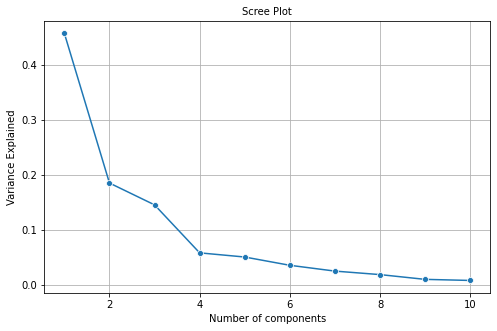

In [108]:
# Create scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y = pca.explained_variance_ratio_, x = range(1,11), marker = 'o')
plt.xlabel('Number of components', fontsize = 10)
plt.ylabel('Variance Explained', fontsize = 10)
plt.title('Scree Plot', fontsize=10)
plt.grid()
plt.show()

In [109]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.4577039 , 0.64342168, 0.7894429 , 0.8482618 , 0.89950441,
       0.93571974, 0.96138698, 0.98068741, 0.99132436, 1.        ])

In [110]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4']]

In [111]:
df_selected

,PC1,PC2,PC3,PC4
Present,-0.392103,0.024519,0.139948,-0.408795
Explain,-0.434778,-0.059537,0.110078,-0.099911
Communi,-0.403284,-0.014940,-0.050879,0.150846
Teach,-0.444793,0.002797,0.053348,-0.005471
Workload,-0.086266,0.625626,-0.249826,-0.164135
Difficulty,-0.038106,0.660349,-0.166281,0.152819
learn.Exp,-0.410599,0.109351,-0.077782,0.182251
Retake,-0.340492,-0.253501,0.004088,0.305236
Inf,-0.018917,-0.181292,-0.679510,0.479402
Kind,-0.054458,-0.243035,-0.636396,-0.627388


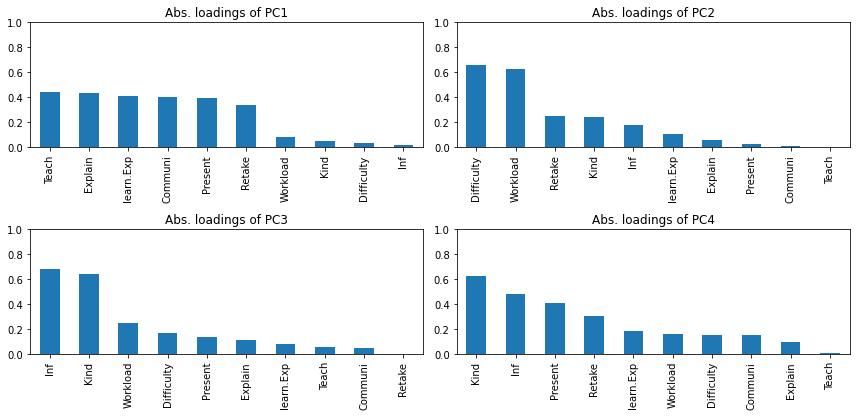

In [112]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

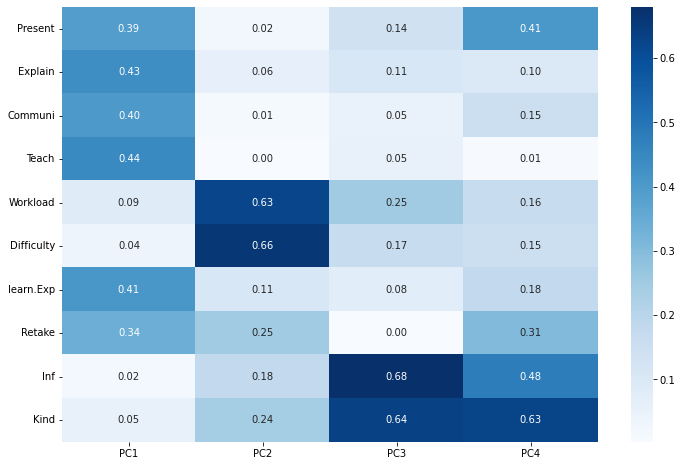

In [113]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [115]:
#...and we need the original scaled features
data_scaled.iloc[0]

Present      -0.165918
Explain       0.804376
Communi       1.091415
Teach         0.654198
Workload     -0.130484
Difficulty   -0.668116
learn.Exp     0.886841
Retake        0.557267
Inf          -0.224247
Kind          1.014335
Name: 0, dtype: float64

In [116]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], data_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-1.583965 -0.839414 -0.371454 -0.344327 

In [118]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=4, random_state=123)
pca_final = pca.fit_transform(data_scaled)

In [119]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4
0,-1.583965,-0.839414,-0.371454,-0.344327
1,2.298054,-1.078056,-0.081397,-1.641647
2,-2.286429,-0.697029,-1.232736,0.613486
3,-1.980287,-0.158660,1.139280,-0.702769
4,-2.708928,0.160569,0.184335,-0.584468
5,-1.051377,0.171531,0.615326,-2.123947
6,-1.974117,-1.392955,0.559194,-0.128559
7,-1.683446,0.419645,-0.870801,-0.470698
8,-3.868681,-0.602509,-0.850797,-0.039709
9,0.260390,-1.602561,1.038453,0.639332


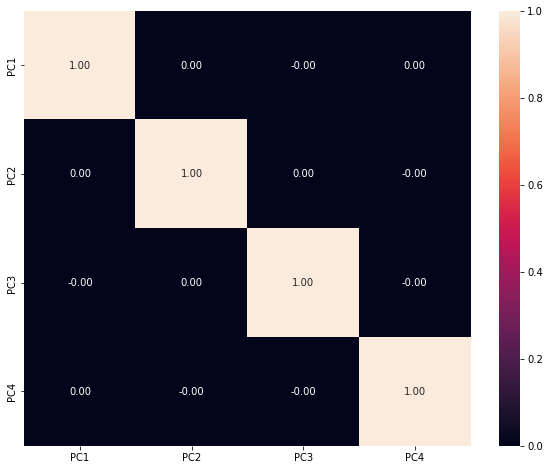

In [120]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [122]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 5.2 MB/s 


In [133]:
theta = seq(0,2*pi,length.out = 100)
theta
circle = data.frame(x = cos(theta), y = sin(theta))
p = ggplot(circle, aes(x,y)) + geom_path()

loadings = data.frame(pca_final_df)
p + geom_text(data=loadings, 
              mapping=aes(x = PC1, y = PC2, label = names, colour =names)) +coord_fixed(ratio=1) +labs(x = "PC1", y = "PC2") +
        theme_bw()

SyntaxError: ignored